## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Loading the Dataset

In [3]:
data = pd.read_csv("vgsales.csv")

In [4]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  \
0      False  False     False  False  False      False     False     False   
1      False  False     False  False  False      False     False     False   
2      False  False     False  False  False      False     False     False   
3      False  False     False  False  False      False     False     False   
4      False  False     False  False  False      False     False     False   
...      ...    ...       ...    ...    ...        ...       ...       ...   
16593  False  False     False  False  False      False     False     False   
16594  False  False     False  False  False      False     False     False   
16595  False  False     False  False  False      False     False     False   
16596  False  False     False  False  False      False     False     False   
16597  False  False     False  False  False      False     False     False   

 

In [8]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
data = data.dropna()

## Plotting the Heat Map

<AxesSubplot: >

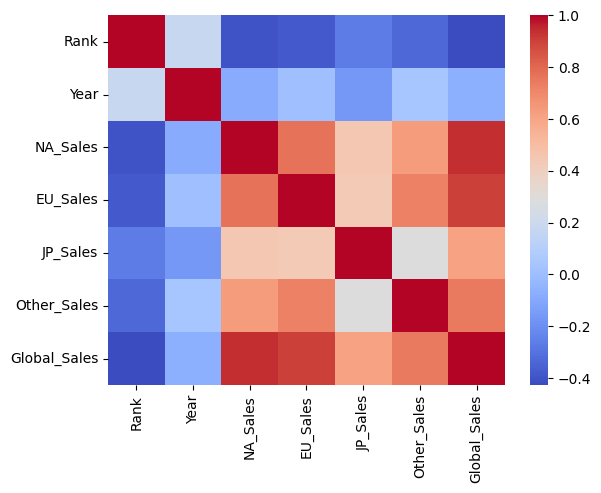

In [10]:
sns.heatmap(data.corr(), cmap="coolwarm")

## Splitting the dataset

In [11]:
x = np.array(data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]])
y = np.array(data["Global_Sales"])

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                               y,
                                               test_size = 0.1,
                                               random_state = 42)

## Train the Model for Video Game Sales Prediction

In [13]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr.score(xtrain, ytrain)

0.99998902407825

In [14]:
lr.predict(xtest)

array([0.56993044, 0.06057484, 0.19026097, ..., 1.62976727, 0.01086961,
       0.07057136])